    Checked for pyodide 

# What 

- 이 노트북은 JupygterLite 환경에서 matplotlib에서 깨지지 않고 한글을 사용하는 방법에 대해서 알려줍니다. 

# Why 

- pyodide를 활용하기 때문에 일반적인 폰트 추가 방법이 먹히지 않는다. 
- ~`koreanize-matplotlib`도 깔리지 않는다.~ pyodide 커널에서 잘 깔린다! 

# How 
- 쉽고 빠른 방법으로 `koreanize-matplotlib` 설치를 다룬다. 
- github(서버)에 깔린 폰트를 가져와서, 부분적으로 적용하는 방법과 전체를 적용하는 방법 모두 다룬다. 

# Quick and Easy: `koreanize-matplotlib`

- 외부 패키지 설치 가능하다. https://jupyterlite.readthedocs.io/en/latest/howto/python/packages.html

In [1]:
%pip install -q koreanize-matplotlib

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import koreanize_matplotlib 

# 그릴 데이터 생성 
def draw_sample(fontprop=None): 
    data = np.random.randint(-100, 100, 50).cumsum()
    plt.plot(range(50), data, 'r')
    plt.title('가격변동 추이', fontproperties=fontprop)
    plt.ylabel('가격', fontproperties=fontprop)
    plt.show()

<class 'ModuleNotFoundError'>: The module 'distutils' is unvendored from the Python standard library in the Pyodide distribution.
You can install it by calling:
  await micropip.install("distutils") in Python, or
  await pyodide.loadPackage("distutils") in JavaScript
See https://pyodide.org/en/stable/usage/loading-packages.html for more details.

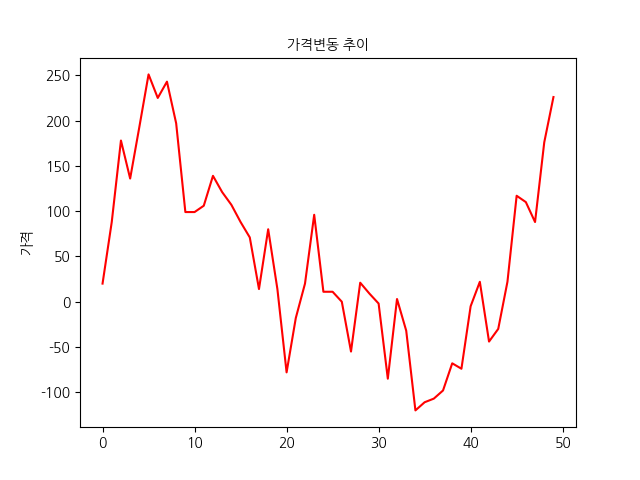

In [3]:
draw_sample()

#### 관련된 패키지를 로드하고, `font/`아래 깔린 D2 폰트를 폰트 리스트에 넣는다. 

- 구동중인 노트북의 위치에 따라서 디렉토리를 조정해줘야 한다. 

In [4]:
font_path = '../font/D2Coding v.1.3.2 ligature Nerd Font Complete.ttf' # 파일의 위치에 따라서 적절하게 조정해야 한다. 
font_callsign = 'D2 Coding Nerd'
fe = fm.FontEntry(
    fname=font_path,
    name=font_callsign)
fm.fontManager.ttflist.insert(0, fe) # or append is fine

# 한글 폰트 잘 깔렸는지 확인하자 
print([(f.name, f.fname) for f in mpl.font_manager.fontManager.ttflist if ('D2' in f.name) | ('Nanum' in f.name) ])

[('D2 Coding Nerd', '../font/D2Coding v.1.3.2 ligature Nerd Font Complete.ttf'), ('NanumGothic', '/lib/python3.10/site-packages/koreanize_matplotlib/fonts/NanumGothic.ttf')]


### 방법1: `fontprop`을 설정해서 직접 해당 속성에 이를 적용한다. 

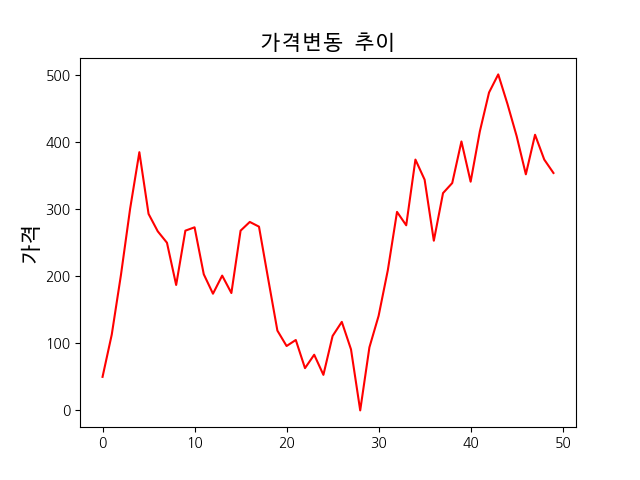

In [5]:
fontprop = fm.FontProperties(fname=font_path, size=15)

draw_sample(fontprop)

### 방법 2: font의 전역적 속성을 설정한다. 

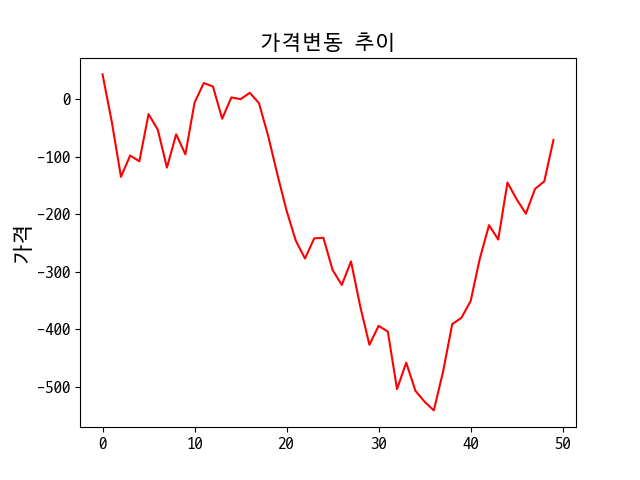

In [6]:
# rcParams 설정
plt.rcParams["font.family"] = 'D2 Coding Nerd'
plt.rcParams['font.size'] = 15.
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.labelsize'] = 12.
plt.rcParams['axes.unicode_minus'] = False

draw_sample()